# 10. lekce: Cvičení

## Kosatce

Vyzkoušej rozhodovací strom na datové sadě o kostatcích ([IRIS.csv](data/IRIS.csv)). U datové sady nemusíš provádět žádné úpravy (OneHot encoding není potřeba, protože jsou tam pouze numerické hodnoty, a Scale není obecně u rozhodovacích stromů potřeba). Zkus vytvořit nízký strom, který má max. 4 patra. Strom si zobraz jako obrázek. Vypočti metriku `accuracy` pro tento strom.

V další části zkus vyhledat optimální parametry rozhodovacího stromu pomocí `GridSearchCV`. 

- Instalace GraphViz: https://graphviz.org/download/
- Instalace modulu pydotplus: `pip install pydotplus`

In [14]:
import pandas
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
from pydotplus import graph_from_dot_data

# Přidání cesty ke Graphvizu do systémové PATH - umožní volat Graphviz
import os
os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin'

In [15]:
# Načtení dat
data = pandas.read_csv("data/IRIS.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
# Rozdělení dat na vstupní proměnné a cílovou klasifikaci
X = data.drop(columns="species")
y = data["species"]

# Rozdělení dat na trénovací a testovací sadu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
# Založení a natrénování klasifikátoru a otestování klasifikace
clf = DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

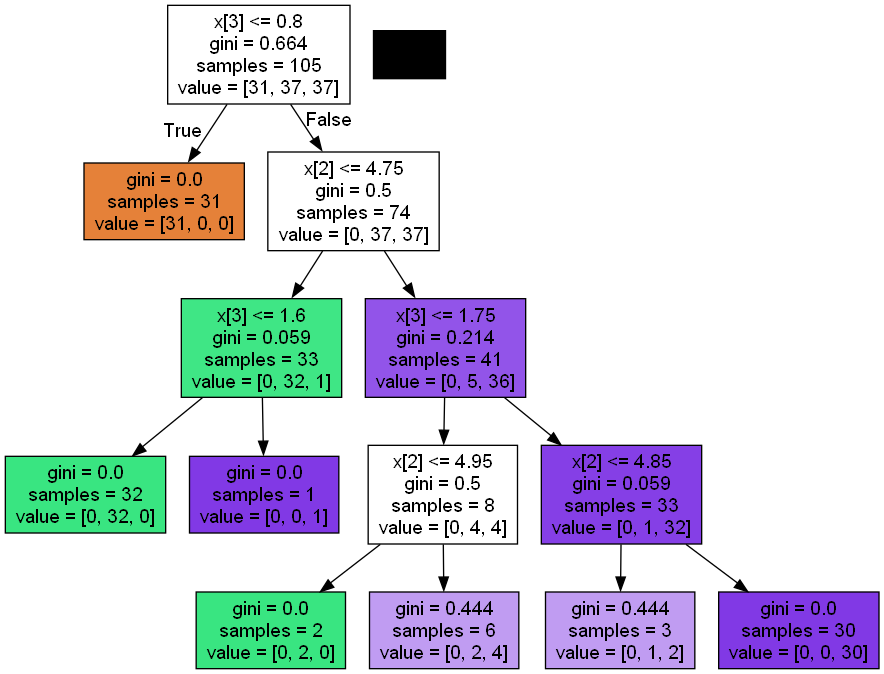

In [18]:
# Vykreslení výsledného stromu
# (komentáře okopírovány z notebooku lekce)

# Vytvoření objektu StringIO, který je jakousi "virtuální" souborovou strukturou v paměti. 
# Tento objekt bude použit pro ukládání struktury rozhodovacího stromu.
dot_data = StringIO()

# Funkce export_graphviz z knihovny sklearn se používá pro konverzi rozhodovacího stromu 
# do DOT formátu, což je grafický jazyk používaný pro popis grafů a stromů. Parametr out_file určuje,
# kam se výsledek uloží - v tomto případě do naší StringIO instance dot_data. Parametr filled=True znamená, 
# že uzly stromu budou vyplněny barvou, což může pomoci vizualizovat hodnoty v uzlech.
export_graphviz(clf, out_file=dot_data, filled=True)

# Tento řádek kódu používá knihovnu pydotplus k převedení DOT dat do formátu, který lze využít pro vytvoření obrázku. 
# Metoda getvalue() naší instance StringIO (dot_data) se používá pro získání celého obsahu jako jednoho řetězce.
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Tento poslední řádek vytváří obrázek stromu ve formátu PNG. Funkce Image pochází z knihovny IPython 
# a slouží pro zobrazení obrázku přímo v notebooku Jupyter. Metoda create_png() na objektu graph generuje samotný obrázek.
Image(graph.create_png())

- V další části zkus vyhledat optimální parametry rozhodovacího stromu pomocí `GridSearchCV`. 

In [19]:
# Založení klasifikátoru
model = DecisionTreeClassifier()

# Otestování osmi hodnot parametru max_depth (hloubka stromu) a čtyř hodnot min_samples_split (minimální počet vzorků stačící k rozdělení uzlu)
params = {"max_depth": [3, 4, 5, 6, 7, 8, 9, 10], "min_samples_split": [10, 20, 30, 40]}

# Otestování všech kombinací parametrů
# CV: Cross-Validation
clf = GridSearchCV(model, params, scoring="accuracy")
clf.fit(X, y)

# Zobrazení parametrů a skóre nejlepšího klasifikátoru
print(clf.best_params_)
print(clf.best_score_)

{'max_depth': 4, 'min_samples_split': 10}
0.9666666666666668
